<a href="https://colab.research.google.com/github/ChocolateMagnate/linguistic-workshop/blob/main/Finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Scikit-learn machine learning in Natural Language Processing

Machine learning becomes an irreplaceble tool to create smart applications and it empowers some of the most impressive modern applications that we take for granted: YouTube, Spotify, Amazon, Google, etc. In this notebook I will explain the basics of machine learning and how linguists can make a difference with it.
Introduction into machine learning

Machine learning is a whole branch of computer science devoted to solve problems that ordinary computing cannot. There's a whole range of tasks that require flexibility, from image detection to machine translation, that cannot be hardcoded with algorithms. These sorts of problems require a degree of abstract thinking and subtle experience. In such domains as image detection, software needs to identify different fragments in the picture and tell apart different classes of beings, which requires knowing how those objects can look like to compare against.

The way how machine learning works is by making a prediction, and whenever the model makes a mistake, it measures its error and remembers it so that next time it's more accurate. With time, when it is fed with a lot of data, it becomes accurate enough to be used in production. Under the hood it just plugs values (known as parameters) into a formula, and when model corrects itself, it adjusts its parameters. At the end, the model is nothing more than a long tree of parameters that need to be plugged into a formula to make a prediction in the release conditions.

There are 3 sorts of machine learning. In the first one, **supervised learning**, the data the model learns from is labelled, and the model is restricted only to output one of the classes it is fed with. Predictions and detection are some of its primary applications. In **unsupervised learning**, however, there are no labels and predetermined output too, so the model must come up with its own output. It is used for classification and creative tasks. Finally, in **reinforcement learning** there is no input nor output, but the model controls an agent that exists in a virtual environment where it needs to accomplish a specific task. In most cases, it happens as machine learning how to play computer games. The process of learning works by trying out random things and whenever it succeeds, it gets reward. The model then remembers this particular action led it to reward and the whole task is to maximize it.

Aside from those three, there's a forth way that can be mixed with those, **deep learning**. It deals with neural networks, a way to make decisions based on a variable sequence of paths. Neural networks consist of layers of nodes that accept a value and each node is connected with nodes from the next layer. In the most primitive example, a network can have just 2 layers: one takes input and the other one represents the output. When value is passed to the next nodes, it is modified with a special algorithm that the connected node receives. At the end, the one node that got the biggest value is the result of processing. However, in most cases there are plenty hidden layers between those two that keep processing data.
# Getting started with Scikit-learn and sentimental analysis

Machine learning deals with extensive mathematics and statistics. Luckily, developers do not need to implement all of those algorithms and data structures themselves to create their own artificial intelligence but can use a number of available frameworks. Python is known to be the powerhouse of TensorFlow, PyTorch, Keras, and today we will study Scikit-learn.

Machine learning is primarily about the data. The algorithms are there, and the task of data scientists is only to learn the frameworks and get data. As we know, machine learns by data, which means it is utmost greatest priority to first collect large enough data for our task.

One of the tasks where machine learning excels for linguists is the ability to match pieces of text by sentiment, which can span from product reviews to global political reception. Sentimental analysis is nothing more than a classification task.

Firstly, we need to gather data. I decided to build the model that will classify **food reviews**. Amazon has kindly shared its dataset that we can use on the public domain conditions.


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
path = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [26]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report

reviews = pd.read_csv(f"{path}/Reviews.csv")
reviews.head()
print(len(reviews))

568454


This dataset contains a large quantity of data, and we are interested in the review itself, that being the columns **Score**, **Summary** and **Text**. Fpr simplicity, we will train our model to identify all reviews as either *positive* or *negative*, where the rates 1-3 will be negative and 4-5 positive accordingly. 

In [3]:
ys: pd.DataFrame = reviews.head(170536) #30% of the dataframe is test data
xs: pd.DataFrame = reviews[170537:] #70% of the dataframe is training data
print(type(xs))
print(xs["Summary"])

<class 'pandas.core.frame.DataFrame'>
170537        A great deal on great popcorn.
170538                 I Love Their Popcorn.
170539                             Very Good
170540         Best Caramel Popcorn I've Had
170541                   Really, Really Good
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 397917, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.5333615759373014, 0.17164179104477612, 0.25623918952310354, 0.1617727771679473, 0.9503051718599422]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.5623524361450956, 0.18606321839080459, 0.2659138850974066, 0.17940312777436318, 0.9487278087547266]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.5821759259259259, 0.19175027870680045, 0.2587187102248621, 0.17688162221410303, 0.9525110673360022]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.5870877549723581, 0.20017646410058454, 0.27322033898305087, 0.17326752538020143, 0.9549174230025294]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.5997966575586198, 0.19797066284327783, 0.2769868173258004, 0.18085149071064563, 0.9546012498140157]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.6039270508991549, 0.19466196095731775, 0.27728813559322035, 0.18566670679346736, 0.9549732182710906]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.6031645167439792, 0.22741810962832248, 0.2824105461393597, 0.18887685084868183, 0.9543036750483559]


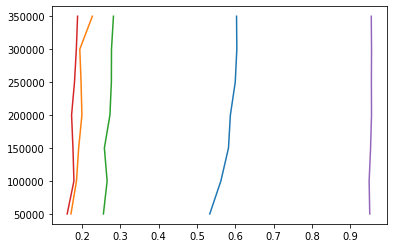

In [30]:
def trainByDistribution(xs: pd.DataFrame, ys: pd.DataFrame, step):
  """Evaluates accuracy of machine learning model by feeding 
    increasing chunks of training data by the step."""  
  accuracies = []
  current = step
  total = len(xs)
  while current <= total:
    #Training the model:
    lr = LogisticRegression()
    cv = CountVectorizer(token_pattern=r'\b\w+\b')
    train = cv.fit_transform(xs["Summary"][:current].apply(lambda x: np.str_(x)))
    test = cv.transform(ys["Summary"][:current].apply(lambda x: np.str_(x)))
    lr.fit(train, xs["Score"][:current])
    #Measuring accuracy:
    predictions = lr.predict(test)
    labels = ["x1", "x2", "x3", "x4", "x5"]
    report = classification_report(predictions, ys["Score"][:current],
                    target_names = labels, output_dict=True)
    accuracy = [report[label]["precision"] for label in labels]
    print(accuracy)
    accuracies.append(accuracy)
    current += step
  plt.plot(accuracies, [x for x in range(step, total, step)])
  return tuple(accuracies)

accuracies = trainByDistribution(xs, ys, 50000)